# Linear Regression - Multiple

#### Submitted By: Ebin Chathoth Sleeba

## Data Set Information

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.We provide the data both in .ods and in .xlsx formats.

## Attribute Information

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

## Import Libraries

In [1]:
    import pandas as pd
    import seaborn as sns
    from pandas.plotting import scatter_matrix
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    %matplotlib inline
        
    import warnings
    warnings.filterwarnings('ignore')

## Import Dataset

In [35]:
#In this step we create a data frame using an excel file.
dataFrame = pd.read_excel("data/Combined_Cycle_Power_Plant.xlsx")

## Exploratory Data Analysis And Pre-processing

##### Understanding the variables in the data set

In [3]:
dataFrame.head()
#From the below, the value which we gonna predict here is (dependant variable) PE 
#using the independent variables AT,V,AP,RH

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [29]:
print("Number of Rows", len(dataFrame))
print("Number of Columns", len(dataFrame.columns))

Number of Rows 9527
Number of Columns 5


In [5]:
dataFrame.describe()
#This gives the basic details about the dataset the count,the maximum value, min value, mean value etc of each column.

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


###### Handling duplicate values

In [36]:
print(f"The given dataset has {dataFrame.duplicated().sum()} duplicate values")

The given dataset has 41 duplicate values


In [37]:
if(dataFrame.duplicated().sum() > 0):
    #Using drop_duplicates we can remove these values so that our model will be more accurate.
    dataFrame.drop_duplicates(inplace=True)
    print(f"Duplicate: {dataFrame.duplicated().sum()}")

Duplicate: 0


###### Handling the missing values

In [9]:
dataFrame.isnull().sum()
#dataFrame.fillna(meanvalue of column)
#There are no empty columns in this dataset

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [10]:
dataFrame.info()
#The values are all numerical and from this we can make sure there are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 446.6 KB


###### Handling Outlliers

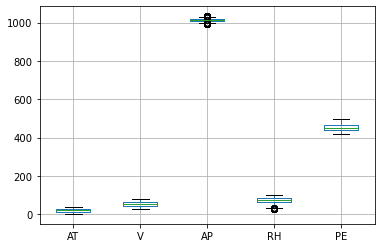

<Figure size 720x720 with 0 Axes>

In [11]:
dataFrame.boxplot()
plt.figure(figsize=(10,10))
plt.show()
#Outliers used to find the data points which are significantly differs from the other observations.
#From this graph it is clear that there are no outlliers, if so we must drop those columns to build before building the model.
#By removing this we can improve the accuracy of the model.

###### Handling Skewness

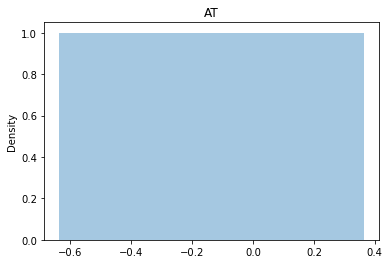

Skew Value:  -0.13610691785154444


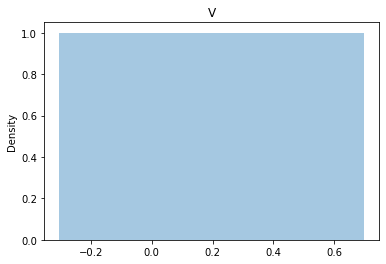

Skew Value:  0.19681878127683464


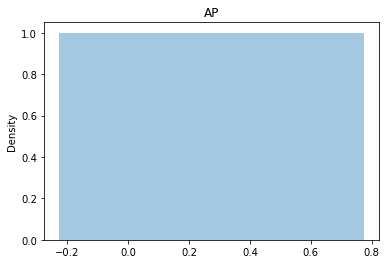

Skew Value:  0.2738456286934675


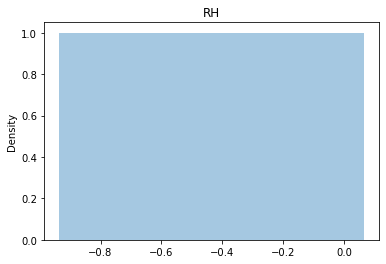

Skew Value:  -0.43513848893895285


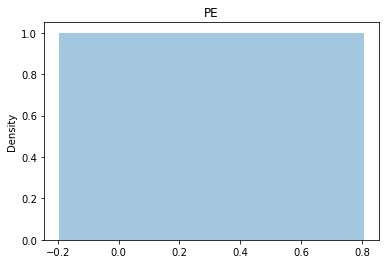

Skew Value:  0.3057905126118896


In [12]:
#Skewness is a measure of the asymmetry of a random variable. 
#A distribution is asymmetrical when its left and right side are not mirror images.
for col in dataFrame.columns:
    plt.title(col)
    sns.distplot(a=dataFrame[col].skew())
    plt.show()
    print("Skew Value: ",dataFrame[col].skew())
#All columns has skewness but it is very less. 
#It has both right and left hand skewed values but no zero skew.
#Since it contains negative values we cannot apply sqrt or log function for reducing the skewness.

###### Finding Correlation Coefficiant

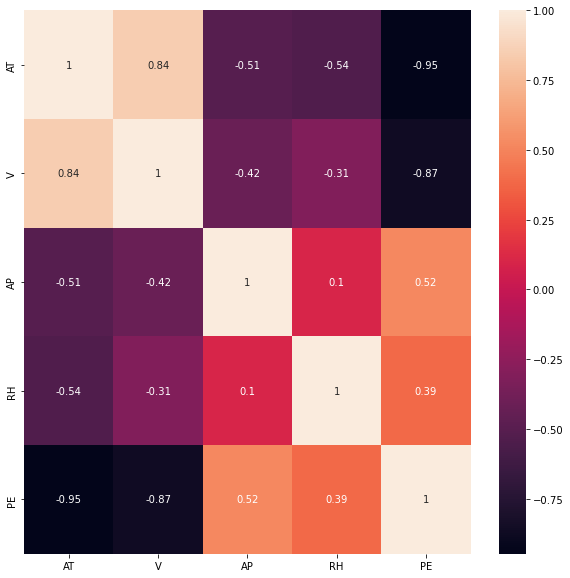

In [13]:
#The correlation coefficiant is a value between -1 - 0 - +1. If values 
#are close to -1 we can say the variable has more negative correlation. If it is close to +1 
#then it has a string positive correlation and if the value is 0 we can say there is no correlation between two variables.

plt.figure(figsize=(10,10))
sns.heatmap(dataFrame.corr(),annot=True)
plt.show()
#From the below graph it is evident that both column V and AT has strong negative correlation with the dependant variable PE
#And the RH and and AP has some positive correlation with the column PE

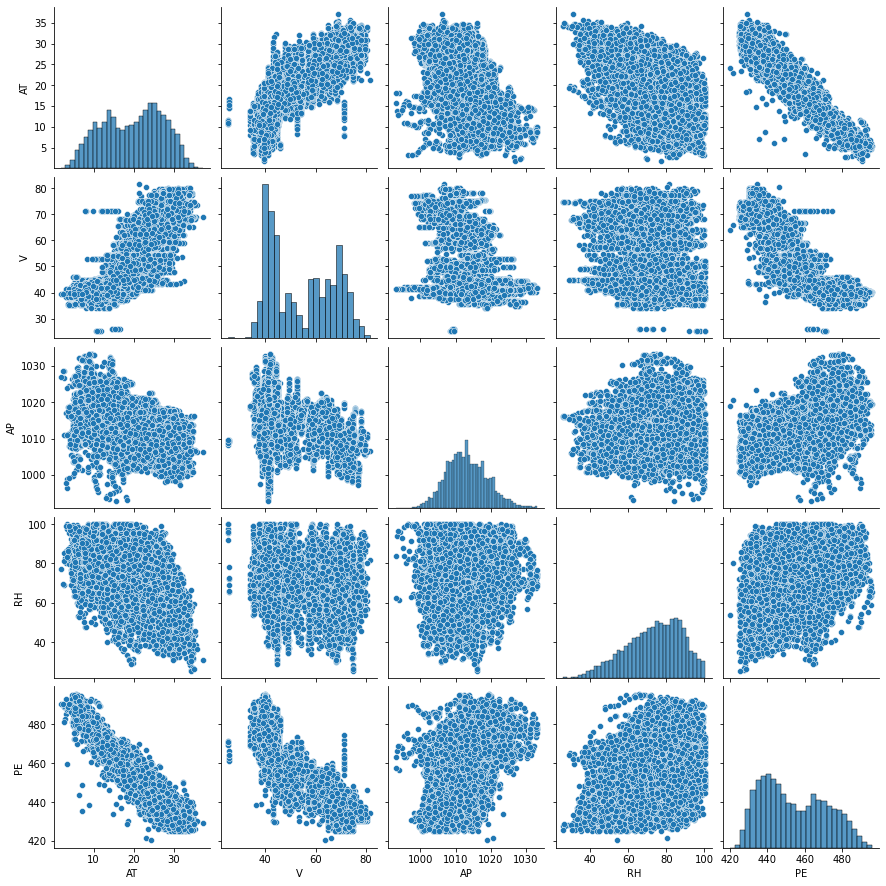

In [27]:
#Dataframe correlation
sns.pairplot(dataFrame)

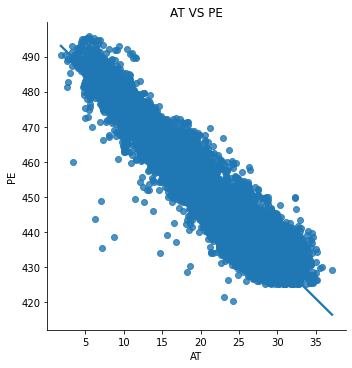

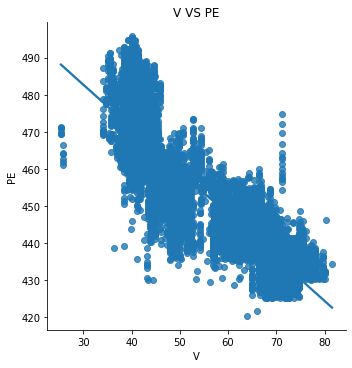

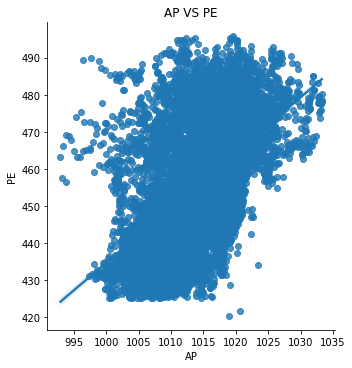

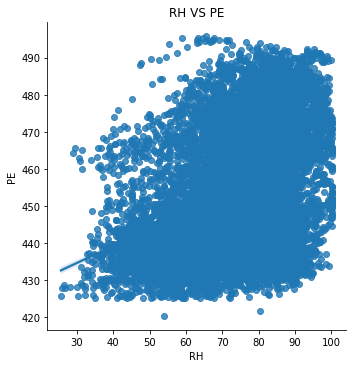

In [28]:
for col in dataFrame.columns:
    if(col != "PE"):
        sns.lmplot(x=col,y="PE",data=dataFrame)
        plt.title(col + " VS PE")
        plt.show()
#The below figure shows the Line of best fit and explains how the independent variable is correlated with the target variable.

## Define x and y

In [15]:
#Defining the target variable and the independent variables for building the model
#Here the target variable (dependant variable) is PE and Independent varibales are RH,AP,V,AT
x=dataFrame.drop(['PE'],axis=1).values
y=dataFrame['PE'].values

In [16]:
#Here the variable x has all the independent variables
print("Values of x:\n")
print(x)

print("\nValues of y:\n")
print(y)

Values of x:

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]

Values of y:

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


## Split the dataset in training  set and test set

In [17]:
#Function train_test_split used for spliting the training and test data set.
#Here the parameter test_size defines how much data are we going to use for testing and training

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=0)

#The test_size = 0.25 means we are going to train the model using 75% of the data 
#and after building the model by using the remaining 25% we will test this.
#Am giving random_state as zero so that I get same result all the time.

## Train the model on the training set

In [18]:
#To build the Linear Regression model we can use the scikit learn LinearRegression function.
model=LinearRegression()

#The training will done using the already splited x_train and y_train values.
#fit is the function used for to train the model.
model.fit(x_train,y_train)

LinearRegression()

## Predict the test set results

In [19]:
#Predict the data using the defined x_test value.
#Calculate the y_hat (predicted value of y) value for testing the accuracy of the model.
y_hat=model.predict(x_test)

In [20]:
#Here we are going to check how much the predicted value is deviated from the actual value using a value from the given data set.
print("Data Frame Row:\n")
print(dataFrame.loc[0])

#As we can see the actual value of PE 463.26 and the predicted value based on the model we built is 467.33.
#Though we cant say the predicted value is not completely accurate.But However, it is almost close to the actual value.
#So we can say our model is accurate and it is ready to test.
print("\nPredicted Value:\n")
model.predict([[14.96,41.76,1024.07,73.17]])

#We can use any random numbers instead of this for testing the model.


Data Frame Row:

AT      14.96
V       41.76
AP    1024.07
RH      73.17
PE     463.26
Name: 0, dtype: float64

Predicted Value:



array([467.33060118])

## Evaluate the model

In [21]:
#Inorder to further evaluate how accurate our model is and how accurate our predicted values are lets evaluate the model 
#using r2 score
r2_score(y_test,y_hat)
#The r2 score is over 90% and from this we can say our model is giving good result

0.9280674873641931

## Plot the results

Text(0.5, 1.0, 'Actual Vs Predicted')

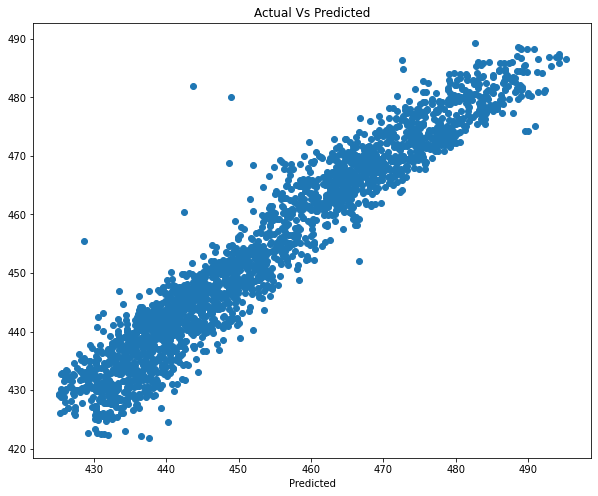

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_hat)
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.title('Actual Vs Predicted')
#Though there are some slight exceptions between the predicted and actual value.
#It is evedent from graph that the predicted value and actual values are pretty close enough.

## Predicted Values

In [23]:
pred_y_difference=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_hat,'Difference':y_test-y_hat})
pred_y_difference
#The below explains the comparision between the predicted value and actual value and the difference between them.

,Actual Value,Predicted Value,Difference
0,488.81,484.501983,4.308017
1,464.41,463.832984,0.577016
2,454.66,460.651150,-5.991150
3,430.36,427.250555,3.109445
4,491.29,486.528817,4.761183
...,...,...,...
2377,475.17,477.421896,-2.251896
2378,482.66,489.311972,-6.651972
2379,437.27,439.517932,-2.247932
2380,463.82,462.954506,0.865494


# Result after Scaling the data 

In [24]:
#Standard scaler is used for standardizing the data.
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_Scaled = x_train.copy()
x_test_Scaled = x_test.copy()

x_train_Scaled = scaler.fit_transform(x_train_Scaled)
x_test_Scaled = scaler.fit_transform(x_test_Scaled)

model_scaled=LinearRegression()

model_scaled.fit(x_train_Scaled,y_train)
y_hat_scaled=model_scaled.predict(x_test_Scaled)
r2_score(y_test,y_hat_scaled)

#There is no improvement in the accuracy of the trained model after using a scaler. 

0.9266151279208358